<a href="https://colab.research.google.com/github/jethaharsha/dataeng-inclass-assignments/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import csv

In [93]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [94]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oregon Hwy 26 Crash Data for 2019 - Crashes on Hwy 26 during 2019.csv')

In [95]:
data.head()

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,...,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,2019.0,5.0,14.0,26.0,0.0,57.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,27.0,40.62,-122.0,22.0,59.23,0.0,NaN,NaN,NaN,NaN,NaN,9.0,16.77,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1809119,2,3409578.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,20.0,1.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,47.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1809119,2,3409579.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,66.0,1.0,1.0,9.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
#Existence Assertions
ea1 = data[data['Crash ID']!="NaN"]
print(ea1)
ea2 = data[data['Record Type']!="NaN"]
print(ea2)

      Crash ID  ...  Participant Striker Flag
0      1809119  ...                       NaN
1      1809119  ...                       NaN
2      1809119  ...                       NaN
3      1809119  ...                       NaN
4      1809119  ...                       NaN
...        ...  ...                       ...
2734   1860771  ...                       NaN
2735   1860771  ...                       NaN
2736   1860771  ...                       NaN
2737   1860771  ...                       NaN
2738   1860771  ...                       NaN

[2739 rows x 157 columns]
      Crash ID  ...  Participant Striker Flag
0      1809119  ...                       NaN
1      1809119  ...                       NaN
2      1809119  ...                       NaN
3      1809119  ...                       NaN
4      1809119  ...                       NaN
...        ...  ...                       ...
2734   1860771  ...                       NaN
2735   1860771  ...                       NaN
2736   

In [5]:
# Restructed the data into 3 different data frames as CrashesDF, VehiclesDF and ParticipantsDF
CrashDF = data[data['Record Type'] == 1]
VehiclesDF = data[data['Record Type'] == 2]
ParticipantsDF = data[data['Record Type'] == 3]

CrashesDF = CrashDF.dropna(axis=1,how='all')
VehiclesDF = VehiclesDF.dropna(axis=1,how='all')
ParticipantsDF = ParticipantsDF.dropna(axis=1,how='all')


In [6]:
print(CrashesDF)
print(VehiclesDF)
print(ParticipantsDF)

      Crash ID  ...  Total Vehicle Occupant Count
0      1809119  ...                           1.0
5      1809229  ...                           0.0
9      1809637  ...                           0.0
12     1810874  ...                           0.0
16     1812266  ...                           3.0
...        ...  ...                           ...
2716   1860371  ...                           1.0
2719   1860417  ...                           0.0
2724   1860427  ...                           1.0
2729   1860453  ...                           0.0
2734   1860771  ...                           1.0

[508 rows x 93 columns]
      Crash ID  ...  Safety Equipment Used Quantity
1      1809119  ...                             1.0
3      1809119  ...                             0.0
6      1809229  ...                             1.0
10     1809637  ...                             1.0
13     1810874  ...                             1.0
...        ...  ...                             ...
2727   1860

In [8]:
#Limit Assertions
#data[(1 <= data['Age']) & (data['Age'] <= 9)]
la1 = ParticipantsDF['Age'].between(1.0,9.0).all()
print(la1) #There are some NaN values in Age value that's why it shows output as False
la2 = CrashesDF['Week Day Code'].between(1.0,7.0).all()
print(la2)

False
True


In [96]:
#Intra-record Assertions to find the Total Count of Persons Involved
ir1 = CrashesDF['Total Pedestrian Count'] + CrashesDF['Total Pedalcyclist Count'] + CrashesDF['Total Unknown Non-Motorist Injury Count'] + CrashesDF['Total Vehicle Occupant Count']
ir1.head(10)

0     1.0
5     0.0
9     0.0
12    0.0
16    3.0
26    1.0
31    1.0
34    0.0
40    0.0
46    0.0
dtype: float64

In [9]:
#Inter-record assertions
intera1 = CrashesDF[CrashesDF['Latitude Degrees']==45.0]
print(intera1)
intera2 = CrashesDF['Latitude Minutes'].between(17.0,41.0).all()
print(intera2)

      Crash ID  ...  Total Vehicle Occupant Count
0      1809119  ...                           1.0
5      1809229  ...                           0.0
9      1809637  ...                           0.0
12     1810874  ...                           0.0
16     1812266  ...                           3.0
...        ...  ...                           ...
2716   1860371  ...                           1.0
2719   1860417  ...                           0.0
2724   1860427  ...                           1.0
2729   1860453  ...                           0.0
2734   1860771  ...                           1.0

[508 rows x 93 columns]
True


In [10]:
#Summary Assertions
sa1 = VehiclesDF['Vehicle ID'].unique().tolist()
print(len(sa1))
sa2 = ParticipantsDF['Participant ID'].unique().tolist()
print(len(sa2))

1015
1216


In [11]:
#Referential Integerity Assertions
ra1 = CrashesDF[['Crash ID','County Code']]
print(ra1.isnull().all())
ra2 = VehiclesDF[['Crash ID','Vehicle ID']]
print(ra2.isnull().all())

Crash ID       False
County Code    False
dtype: bool
Crash ID      False
Vehicle ID    False
dtype: bool


In [49]:
#Statistical Distribution Assertions
sda1 = CrashesDF['Crash Month'].value_counts()
print(sda1)

3.0     57
1.0     56
4.0     53
2.0     46
12.0    44
5.0     41
7.0     37
6.0     36
10.0    36
11.0    35
9.0     34
8.0     33
Name: Crash Month, dtype: int64


In [50]:
temp=[]
for i in range(1,13):
  temp.append(sda1[i])
print(temp)

[56, 46, 57, 53, 41, 36, 37, 33, 34, 36, 35, 44]


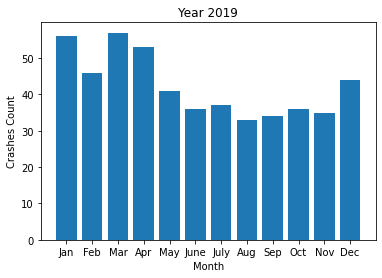

In [51]:
import numpy as np
import matplotlib.pyplot as plt

Month = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

plt.bar(Month, temp)
plt.xlabel("Month")
plt.ylabel('Crashes Count')
plt.title('Year 2019')

plt.show()

In [58]:
sda2 = CrashesDF['Week Day Code'].value_counts()
print(sda2)
temp1=[]
for i in range(1,8):
  temp1.append(sda2[i])
print(temp1)

7.0    83
6.0    77
3.0    75
4.0    74
2.0    71
5.0    68
1.0    60
Name: Week Day Code, dtype: int64
[60, 71, 75, 74, 68, 77, 83]


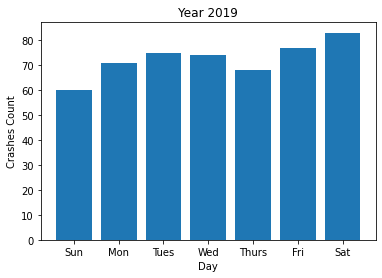

In [59]:
import numpy as np
import matplotlib.pyplot as plt

day = ['Sun','Mon','Tues','Wed','Thurs','Fri','Sat']

plt.bar(day, temp1)
plt.xlabel("Day")
plt.ylabel('Crashes Count')
plt.title('Year 2019')

plt.show()

In [70]:
# Resolved the Limit Assertion Age Violation 
age_viol = ParticipantsDF.dropna(subset=['Age'])
la1_re = age_viol['Age']!="NaN"
la1_check = age_viol['Age'].between(0.0,9.0).all()
print(la1_check)

True
